 Projet MMDM
Sujet 2 : Text Mining

In [ ]:
import math
import nltk as nk
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as kmeans
from nltk.corpus import reuters
from nltk import word_tokenize
from nltk.corpus import reuters
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re
from scipy.spatial.distance import pdist, euclidean
from sklearn.decomposition import non_negative_factorization
from sklearn.decomposition import NMF
from scipy.stats import entropy
from math import log, e
from sklearn.metrics.pairwise import polynomial_kernel as pk
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics.pairwise import rbf_kernel as rbf
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
import pandas as pd
from sklearn.metrics import log_loss as sk_entropy
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import csr_matrix
#import pymf3
from functools import reduce
from numba import njit, jit
import argparse
import time
import csv

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
!pip install requests==2.22.0 beautifulsoup4==4.9.3
from bs4 import BeautifulSoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 2.9 MB/s 
     |████████████████████████████████| 115 kB 10.7 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
  Attempting uninstall: idna
    Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests>=2.23.0, but you have requests 

# Partie 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Lecture des données => création de reuters_data**

In [ ]:
reuters_data = []
for file in os.listdir("/content/drive/MyDrive/data"):

    if file.endswith(".sgm"):

        # for each sgm file, read it
        filename = os.path.join("/content/drive/MyDrive/data", file)
        f = open(filename, 'r', encoding='utf-8', errors='ignore')
        dataFile = f.read()

        # pass it to BeautifulSoup
        soup = BeautifulSoup(dataFile, 'html.parser')
        contents = soup.findAll('body')

        # for each body tag, extract it's text
        for content in contents:
            reuters_data.append(content.text)


In [ ]:
print(reuters_data[0])
print("---------------")
print(reuters_data[1])

Showers continued throughout the week in
the Bahia cocoa zone, alleviating the drought since early
January and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
Comissaria Smith said in its weekly review.
    The dry period means the temporao will be late this year.
    Arrivals for the week ended February 22 were 155,221 bags
of 60 kilos making a cumulative total for the season of 5.93
mln against 5.81 at the same stage last year. Again it seems
that cocoa delivered earlier on consignment was included in the
arrivals figures.
    Comissaria Smith said there is still some doubt as to how
much old crop cocoa is still available as harvesting has
practically come to an end. With total Bahia crop estimates
around 6.4 mln bags and sales standing at almost 6.2 mln there
are a few hundred thousand bags still in the hands of farmers,
middlemen, exporters and processors.
    There are doubts as to how much of this cocoa would be fit
for export 

**Lecture des labels (topics) => création de reuters_labels**

In [ ]:
reuters_labels = [] ##traitement des labels
i=0
for file in os.listdir("/content/drive/MyDrive/data"):

    if file.startswith("all-topics-strings"):

        # for each sgm file, read it
        filename = os.path.join("/content/drive/MyDrive/data", file)
        f = open(filename, 'r', encoding='utf-8', errors='ignore')
        dataFile = f.read()
        word=""
        reuters_labels.append("")
        for line in dataFile:
            if line != "\n":
              word = word + line
              reuters_labels[i]=word
            else:
              word=""
              i+=1
              reuters_labels.append("")

for word in reuters_labels:#on enlève les espaces inutiles
  word.replace(" ", "")

In [ ]:
print(reuters_labels)

['acq', 'alum', 'austdlr', 'austral', 'barley', 'bfr', 'bop', 'can', 'carcass', 'castor-meal', 'castor-oil', 'castorseed', 'citruspulp', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'corn-oil', 'cornglutenfeed', 'cotton ', 'cotton-meal', 'cotton-oil', 'cottonseed', 'cpi', 'cpu', 'crude', 'cruzado', 'dfl', 'dkr', 'dlr', 'dmk', 'drachma', 'earn', 'escudo', 'f-cattle', 'ffr', 'fishmeal', 'flaxseed', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-meal', 'groundnut-oil', 'heat', 'hk', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'inventories', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-meal', 'lin-oil', 'linseed', 'lit', 'livestock', 'lumber', 'lupin', 'meal-feed', 'mexpeso', 'money-fx', 'money-supply', 'naphtha     ', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-meal', 'palm-oil', 'palmkernel', 'peseta', 'pet-chem', 'platinum', 'plywood', 'pork-belly', 'potato', 'propan

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True



---

**transformer les données au format “term
frequency-inverse document frequency”.**

In [ ]:
def get_tf_idf(list_text):
  from sklearn.feature_extraction.text import TfidfVectorizer
  tr_idf_model   = TfidfVectorizer(stop_words = stopwords.words('english'),min_df = 0.01,max_df = 0.7, use_idf=True, norm=None)
  tf_idf_vector = tr_idf_model.fit_transform(list_text)
  feature_names = tr_idf_model.get_feature_names_out()
  return (tf_idf_vector,feature_names)

In [ ]:
X = get_tf_idf(reuters_data)
frequences_mots = X[0]
mots = X[1]


In [ ]:
print(len(mots))
print(mots)

1202
['00' '000' '05' ... 'yet' 'yield' 'york']


In [ ]:
print(frequences_mots)

  (0, 288)	3.7268136709670108
  (0, 1130)	3.319210667870321
  (0, 228)	5.493215204604985
  (0, 453)	3.2758505197196466
  (0, 481)	4.647931443589481
  (0, 103)	4.890928026695963
  (0, 22)	3.1077744625607875
  (0, 102)	4.616182745274902
  (0, 21)	2.714483417851489
  (0, 10)	3.6203301905645606
  (0, 438)	4.2532772515855335
  (0, 346)	4.360753530462723
  (0, 33)	10.129013028463874
  (0, 1007)	4.247857184116194
  (0, 320)	4.598757328561042
  (0, 49)	5.046364880333965
  (0, 178)	9.976078626762225
  (0, 344)	8.450288233753922
  (0, 37)	8.108674604024419
  (0, 51)	9.312057307644203
  (0, 1117)	35.93936915594898
  (0, 36)	16.455952042832745
  (0, 695)	8.945013585866056
  (0, 176)	11.94654351967235
  (0, 675)	3.461859849592786
  :	:
  (19042, 1115)	3.036077098243753
  (19042, 596)	5.252388549434708
  (19042, 604)	5.248705304018412
  (19042, 361)	24.468002267653358
  (19042, 23)	8.426650401147636
  (19042, 1113)	4.251919478125073
  (19042, 254)	5.571303641576421
  (19042, 560)	4.858055281695389
 

création de reuters4 et labels4

In [ ]:
'''#Version 1 (une liste de textes)
reuters4=df_tf_idf[:400]
labels4=[]
position = 0
for i in range(len(reuters4)//100):
  for j in range(100):
    if position == 135:
      position = 0
    labels4.append([reuters_labels[position]])
  position+=1'''

'#Version 1 (une liste de textes)\nreuters4=df_tf_idf[:400]\nlabels4=[]\nposition = 0\nfor i in range(len(reuters4)//100):\n  for j in range(100):\n    if position == 135:\n      position = 0\n    labels4.append([reuters_labels[position]])\n  position+=1'

In [ ]:
#Version 2 (chaque mot est une colonne)
reuters4=frequences_mots[:400]
print(reuters4.shape)
labels4=[]
position = 0
for i in range(reuters4.shape[0]//100):
  for j in range(100):
    if position == 4:
      position = 0
    labels4.append(reuters_labels[position])
  position+=1


(400, 1202)


In [ ]:
print(reuters4)

  (0, 288)	3.7268136709670108
  (0, 1130)	3.319210667870321
  (0, 228)	5.493215204604985
  (0, 453)	3.2758505197196466
  (0, 481)	4.647931443589481
  (0, 103)	4.890928026695963
  (0, 22)	3.1077744625607875
  (0, 102)	4.616182745274902
  (0, 21)	2.714483417851489
  (0, 10)	3.6203301905645606
  (0, 438)	4.2532772515855335
  (0, 346)	4.360753530462723
  (0, 33)	10.129013028463874
  (0, 1007)	4.247857184116194
  (0, 320)	4.598757328561042
  (0, 49)	5.046364880333965
  (0, 178)	9.976078626762225
  (0, 344)	8.450288233753922
  (0, 37)	8.108674604024419
  (0, 51)	9.312057307644203
  (0, 1117)	35.93936915594898
  (0, 36)	16.455952042832745
  (0, 695)	8.945013585866056
  (0, 176)	11.94654351967235
  (0, 675)	3.461859849592786
  :	:
  (399, 989)	5.216152700980664
  (399, 469)	4.408787550928831
  (399, 966)	4.916971165231983
  (399, 447)	4.306288267552037
  (399, 743)	4.888360631190717
  (399, 1112)	4.774574175218819
  (399, 645)	4.374462808387756
  (399, 487)	4.568509275805544
  (399, 813)	5.002

Création de reut_train et reut_test

In [ ]:
'''#V1
x = (len(reuters_data)-400)%75 #taille de reut_train
x=len(reuters_data)-43
reut_train=reuters_data[400:x]
reut_test=reuters_data[x:]'''

'#V1\nx = (len(reuters_data)-400)%75 #taille de reut_train\nx=len(reuters_data)-43\nreut_train=reuters_data[400:x]\nreut_test=reuters_data[x:]'

In [ ]:
#V2
reut_train_taille = 75*4 #taille de reut_train
reut_train=frequences_mots[:reut_train_taille]
reut_test=frequences_mots[reut_train_taille:400]


In [ ]:
print(reut_train)

  (0, 288)	3.7268136709670108
  (0, 1130)	3.319210667870321
  (0, 228)	5.493215204604985
  (0, 453)	3.2758505197196466
  (0, 481)	4.647931443589481
  (0, 103)	4.890928026695963
  (0, 22)	3.1077744625607875
  (0, 102)	4.616182745274902
  (0, 21)	2.714483417851489
  (0, 10)	3.6203301905645606
  (0, 438)	4.2532772515855335
  (0, 346)	4.360753530462723
  (0, 33)	10.129013028463874
  (0, 1007)	4.247857184116194
  (0, 320)	4.598757328561042
  (0, 49)	5.046364880333965
  (0, 178)	9.976078626762225
  (0, 344)	8.450288233753922
  (0, 37)	8.108674604024419
  (0, 51)	9.312057307644203
  (0, 1117)	35.93936915594898
  (0, 36)	16.455952042832745
  (0, 695)	8.945013585866056
  (0, 176)	11.94654351967235
  (0, 675)	3.461859849592786
  :	:
  (298, 691)	5.777229270459761
  (298, 773)	7.265343090051921
  (298, 1007)	4.247857184116194
  (298, 176)	5.973271759836175
  (298, 650)	5.209060472671172
  (298, 1123)	10.425200598752593
  (298, 398)	7.646094817315047
  (298, 824)	6.459776768310022
  (298, 407)	4.0

In [ ]:
print(reut_test)

  (0, 711)	16.07201743506362
  (0, 1197)	8.715464760257094
  (0, 965)	5.21971776714516
  (0, 348)	3.993843698866123
  (0, 510)	9.839226349389644
  (0, 374)	15.691469592381212
  (0, 389)	5.23410650459726
  (0, 362)	4.885799810329043
  (0, 415)	4.684896637822954
  (0, 370)	4.23576838679719
  (0, 947)	9.232365490549803
  (0, 770)	7.6704214331987295
  (0, 77)	5.14408035293954
  (0, 547)	4.280827203353764
  (0, 645)	4.374462808387756
  (0, 40)	4.264206322117723
  (0, 840)	18.127768521548504
  (0, 531)	4.723280880831268
  (0, 825)	10.930871280995817
  (0, 260)	4.0344910056402785
  (0, 843)	4.255998341699893
  (0, 1016)	3.8026517473585155
  (0, 14)	3.624668592163159
  (0, 919)	5.101934731488776
  (0, 416)	4.397737714742246
  :	:
  (99, 989)	5.216152700980664
  (99, 469)	4.408787550928831
  (99, 966)	4.916971165231983
  (99, 447)	4.306288267552037
  (99, 743)	4.888360631190717
  (99, 1112)	4.774574175218819
  (99, 645)	4.374462808387756
  (99, 487)	4.568509275805544
  (99, 813)	5.0023048905399

Création de labels_train et labels_test

In [ ]:
#V1+V2
labels_train=[]
labels_test=[]
for i in range(reut_train.shape[0]//75):
    for j in range(75):
      if position == 4:
        position = 0
      labels_train.append(reuters_labels[position])
    position = position+1

for i in reut_test:
  if position ==4:
    position = 0
  labels_test.append(reuters_labels[position])
  position+=1


In [ ]:
print(labels_train)

['acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'acq', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'alum', 'a

Comparaison des matrices étiquettes et matrices de données.

In [ ]:
print(reuters4.shape[0])
print(len(labels4))
print(reut_train.shape[0])
print(len(labels_train))
print(reut_test.shape[0])
print(len(labels_test))

400
400
300
300
100
100


Création d'une matrice de label englobant nos 19043 textes pour faire ensuite l'affichage.

In [ ]:
#pour la pca
reut_label_t = labels4 + labels_train + labels_test
print(len(reut_label_t))

800


fonction réduisant notre matrice à k dimensions (cette fonction ne fonctionne qu'avec une liste de texte cependant car nous utilisons "TfidfVectorizer".

In [ ]:
def frequent_terms(frequences_mots,mots,k):
  tf_idf_array = frequences_mots.toarray()
  import pandas as pd
  df_tf_idf = pd.DataFrame(tf_idf_array, columns = mots)
  ###########################################################################most_frequent_words
  word_global_frequency = {}#dictionnaire des mots avec pour chaque mot sa fréquence.
  for word in df_tf_idf:
    word_global_frequency[word]=0 # valeurs par défaut de la fréquence du mot
    for val in df_tf_idf[word]:
      word_global_frequency[word]+=val # chaque fois que l'on trouve le mot, incrémenter
  for word in word_global_frequency:
    word_global_frequency[word]/=19043#diviser la fréquence d'apparition des mots par le nombre de textes.
  ###########################################################################
  key_table = []
  value_table = []
  i = 0
  while i != k:# prendre le max k fois depuis notre dictionnaire de fréquences.
    max_key = max(word_global_frequency, key=word_global_frequency.get)
    if len(max_key) >=4:
      key_table.append(max_key)
    else:
      i-=1
    del word_global_frequency[max_key]
    i+=1
  retour = {}
  for key in key_table:
    retour[key]=df_tf_idf[key]
  return retour


On appelle la fonction pour réduire la matrice à 3 dimensions.

In [ ]:
D = frequent_terms(frequences_mots,mots,3) #matrice avec touts les textes

In [ ]:
D.keys() #nos 3 mots les plus fréquents

dict_keys(['dlrs', 'billion', 'year'])

In [ ]:
D2 = frequent_terms(reuters4,mots,3) #matrice de 400 textes

In [ ]:
D2.keys()

dict_keys(['dlrs', 'billion', 'year'])

In [ ]:
df = pd.DataFrame(D) #transformation en dataframe pour la pca.
df

,dlrs,billion,year
0,26.761332,0.00000,4.302001
1,0.000000,0.00000,0.000000
2,3.823047,5.54174,0.000000
3,5.734571,5.54174,2.151001
4,3.823047,0.00000,0.000000
...,...,...,...
19038,0.000000,0.00000,0.000000
19039,0.000000,2.77087,6.453002
19040,0.000000,0.00000,0.000000
19041,0.000000,0.00000,0.000000


In [ ]:
df2 = pd.DataFrame(D2) #transformation en dataframe pour la pca.
df2

,dlrs,billion,year
0,26.761332,0.00000,4.302001
1,0.000000,0.00000,0.000000
2,3.823047,5.54174,0.000000
3,5.734571,5.54174,2.151001
4,3.823047,0.00000,0.000000
...,...,...,...
395,3.823047,0.00000,0.000000
396,1.911524,2.77087,2.151001
397,1.911524,0.00000,0.000000
398,0.000000,0.00000,4.302001


Fonction PlotClusters

In [ ]:
from sklearn.decomposition import PCA
def PlotClusters(docs,labels,elev,azim):
  pca = PCA(n_components=3)
  principalComponents = pca.fit_transform(docs)
  principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2','principal component 3'])
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111,projection='3d')
  ax.set_xlabel(docs.columns[0], fontsize = 15)
  ax.set_ylabel(docs.columns[1], fontsize = 15)
  ax.set_zlabel(docs.columns[2], fontsize = 15)
  ax.set_title(' PCA de 3 composants ',fontsize=20)
  principalDf['labels']=labels

  ################################
  targets = [0,1,2,3]
  cats =["corn","interest","ship","gold"]
  colors = ['r','g','b','y']
  for target , color in zip(targets,colors):
      indicesToKeep = principalDf['labels'] == target
      ax.scatter(principalDf.loc[indicesToKeep,'principal component 1'],principalDf.loc[indicesToKeep,'principal component 2'],principalDf.loc[indicesToKeep,'principal component 3'],c =color,s=30)
      ax.legend(targets)
      ax.grid(cats)
  ax.view_init(elev, azim)

136 labels (pas tous affichés)

4 labels (tous affichés)

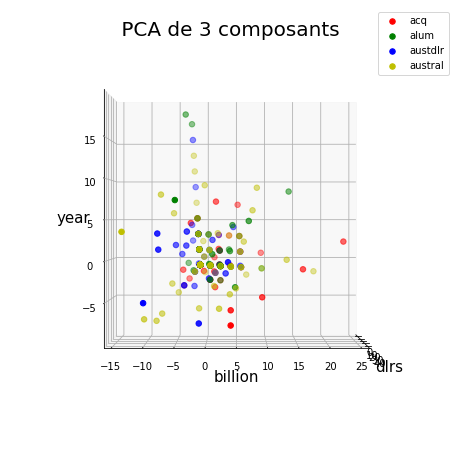

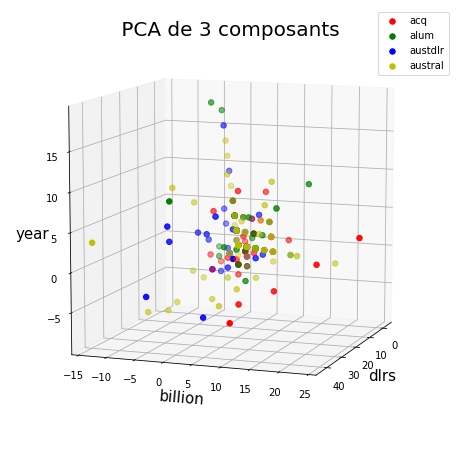

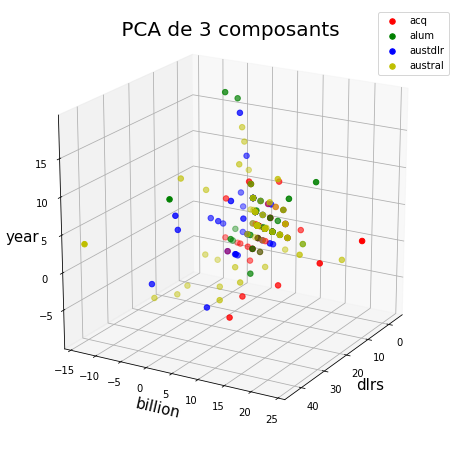

In [ ]:
PlotClusters(df2,labels4,0,0)
PlotClusters(df2,labels4,10,20)
PlotClusters(df2,labels4,20,30)

# Partie 2

In [ ]:
def show_clusters(H):#On cherche un  ́element maximal dans chaque ligne et on le remplace par 1. Tous les autres  ́elements sont remplaces par 0.
  for i in range(H.shape[0]) :
      max_v = None
      for j in range(H.shape[1]-1): #change
              if max_v is None or H[i][j] > max_v :
                  max_v = H[i][j]
                  i1= i
                  j1=j
                  H[i][j] = 0

              if  H[i][j] < max_v :

                  H[i][j] = 0

      H[i1][j1]=1
  return H

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
model = NMF(n_components=4, init='random', random_state=0)
W_train = model.fit_transform(reut_train)
print("------------------reut_train=",reut_train.shape)
H = model.components_
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
H = show_clusters(H)
print(H.shape)
H_inverse = np.linalg.pinv(H)
print("reut_test :",reut_test.shape," H_inverse:",H_inverse.shape)
H_test = reut_test @ H_inverse

------------------reut_train= (300, 1202)
(4, 1202)
reut_test : (100, 1202)  H_inverse: (1202, 4)


In [ ]:
print(W_train.shape)
print(H.shape)
B = np.linalg.pinv(W_train)
print(B.shape)
print(reut_test.shape)
print(reut_train.shape)

print(reuters4.shape)

(300, 4)
(4, 1202)
(4, 300)
(100, 1202)
(300, 1202)
(400, 1202)


In [ ]:
for i in range(H.shape[0]) :
    for j in range(H.shape[1]-1):
        if H[i][j] == 1 :
            print(i, j, '=', H[i][j])

0 821 = 1.0
1 1124 = 1.0
2 1174 = 1.0
3 1165 = 1.0


In [ ]:
from sklearn.metrics import accuracy_score

Question d

In [ ]:
print("(l’indice DB de Davies et Bouldin",metrics.davies_bouldin_score(H_test, labels_test))
print("l’indice CH de Calinsky et Harabsz",metrics.calinski_harabasz_score(H_test, labels_test))

(l’indice DB de Davies et Bouldin 7.020570745175145
l’indice CH de Calinsky et Harabsz 0.786274153814816


In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np

# loading the dataset
X, y = datasets.load_iris(return_X_y=True)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=1).fit(H_test)

# we store the cluster labels
labels = kmeans.labels_

print("l’indice CH de Calinsky et Harabsz",metrics.calinski_harabasz_score(H_test, labels))

l’indice CH de Calinsky et Harabsz 111.0851883249139


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
import numpy as np

'''def entropy(matrix2):
  import sys
  matrix = np.array(matrix2)
  # Normalize the matrix so that the elements sum to 1
  matrix = matrix / np.sum(np.array(matrix))
  matrix = np.absolute(matrix) #valeur absolue car le logarithm ne prend que des entrées positives
  matrix[matrix == 0] = sys.float_info.epsilon # on transforme les 0 en epsilon car le logarithm de prend pas de valeur nulles en entrée.

  # Calculate the entropy
  entropy = -np.sum(np.multiply(matrix,np.log2(matrix)))

  return entropy'''

'def entropy(matrix2):\n  import sys\n  matrix = np.array(matrix2)\n  # Normalize the matrix so that the elements sum to 1\n  matrix = matrix / np.sum(np.array(matrix))\n  matrix = np.absolute(matrix) #valeur absolue car le logarithm ne prend que des entrées positives\n  matrix[matrix == 0] = sys.float_info.epsilon # on transforme les 0 en epsilon car le logarithm de prend pas de valeur nulles en entrée.\n  \n  # Calculate the entropy\n  entropy = -np.sum(np.multiply(matrix,np.log2(matrix)))\n  \n  return entropy'

In [ ]:
print("entropie",entropy(H_test))

entropie [3.47295438 0.99259107       -inf       -inf]


In [ ]:
from scipy.stats import entropy
print("entropy",entropy(H_test))

entropy [3.47295438 0.99259107       -inf       -inf]


In [ ]:
print(W_train.shape)
print(H_test.shape)
print("puretée = ",purity_score(H_test,W_train[:100]))

(300, 4)
(100, 4)
puretée =  0.9525


In [ ]:
print(H_test)
print(W_train.shape)

[[ 4.31967535e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.51188637e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.02377274e+01  6.22882051e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.63935070e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.15983767e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.63935070e+00  0.00000000e+00  7.12794194e+00  3.97196693e-01]
 [ 0.00000000e+00  4.15254700e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.15983767e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.37582144e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000

    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])

    return np.min(values)

def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])

    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])

    return np.max(values)

def dunn(k_list):
    """ Dunn index [CVI]

    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))

    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])

        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [ ]:
def Dunn(matrix,labels):
  import pandas as pd
  # K-Means
  from sklearn import cluster
  k_mean_s = cluster.KMeans(n_clusters=4)
  k_mean_s.fit(matrix) #K- mean s training
  #y_pred = k_mean_s.predict(H_test)
  # We store the K- mean s results in a dataframe
  pred = pd.DataFrame(matrix)
  l = labels
  for i in range(len(l)):

      if l[i] == 'acq':
          l[i] = 0

      if l[i] == 'alum':
          l[i] = 1

      if l[i] == 'austdlr':
          l[i] = 2

      if l[i] == 'austral':
          l[i] = 3

  pred['Type'] = l

  # we merge this dataframe with df
  prediction = pd.concat([df, pred], axis = 1)
  # We store the clusters
  clus0 = prediction.loc[prediction.Type == 0]
  clus1 = prediction.loc[prediction.Type == 1]
  clus2 = prediction.loc[prediction.Type == 2]
  clus3 = prediction.loc[prediction.Type == 3]
  cluster_list = [clus0.values, clus1.values, clus2.values,clus3.values]

  return dunn(cluster_list)

In [ ]:
df3 = pd.DataFrame(H_test)
df3

,0,1,2,3
0,4.319675e+00,2.220446e-16,2.220446e-16,2.220446e-16
1,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
2,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
3,1.511886e+01,2.220446e-16,2.220446e-16,2.220446e-16
4,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
...,...,...,...,...
95,2.159838e+00,2.220446e-16,2.220446e-16,2.220446e-16
96,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
97,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
98,6.479513e+00,2.220446e-16,2.220446e-16,2.220446e-16


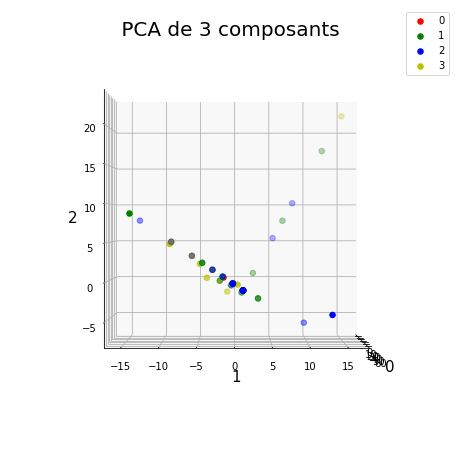

In [ ]:
df3 = pd.DataFrame(H_test)
X = []
j=0
for i in range(df3.shape[0]):
  X.append(j)
  if j ==3:
    j=0
  j+=1
PlotClusters(df3,X,0,0)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
model = NMF(n_components=4, init='random', random_state=0)
W_train = model.fit_transform(reut_train) #prototype
print("------------------reut_train=",reut_train.shape)
H = model.components_  #partition
print(" W_train:",W_train.shape, "H :",H.shape)
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
H = show_clusters(H)
H_inverse = np.linalg.pinv(H)
print("reut_test :",reut_test.shape," H_inverse:",H_inverse.shape)
H_test = reut_test @ H_inverse



F= model.fit_transform(reuters4)
GT = model.components_
print("F :",F.shape," GT:",GT.shape)
model1 = NMF(n_components=4, init='random', random_state=0)
S =  model1.fit_transform(GT)
GT2 = model1.components_
print("S :",S.shape," GT2:",GT2.shape)


import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

# From the Wikipedia Article on QR Decomposition
Q, R = scipy.linalg.qr(F)

from scipy.linalg import orth
import numpy as np

# Créez une matrice non orthogonale


# Calculez la matrice orthogonale la plus proche de A
B = orth(Q)

# Vérifiez si B est orthogonale
print(np.allclose(np.dot(B, B.T), np.eye(B.shape[0])))  # doit afficher True
print(np.dot(B, B.T))

------------------reut_train= (300, 1202)
 W_train: (300, 4) H : (4, 1202)
reut_test : (100, 1202)  H_inverse: (1202, 4)
F : (400, 4)  GT: (4, 1202)
S : (4, 4)  GT2: (4, 1202)
True
[[ 1.00000000e+00  7.63278329e-17  2.77555756e-17 ... -3.64291930e-17
   1.77809156e-17 -8.67361738e-19]
 [ 7.63278329e-17  1.00000000e+00  1.11022302e-16 ...  2.42861287e-17
  -6.93889390e-18 -1.73472348e-17]
 [ 2.77555756e-17  1.11022302e-16  1.00000000e+00 ... -3.29597460e-17
   8.76035355e-17  3.81639165e-17]
 ...
 [-3.64291930e-17  2.42861287e-17 -3.29597460e-17 ...  1.00000000e+00
  -4.16333634e-17 -2.08166817e-17]
 [ 1.77809156e-17 -6.93889390e-18  8.76035355e-17 ... -4.16333634e-17
   1.00000000e+00 -1.99493200e-17]
 [-8.67361738e-19 -1.73472348e-17  3.81639165e-17 ... -2.08166817e-17
  -1.99493200e-17  1.00000000e+00]]


In [ ]:
import numpy as np

def symmetric_nmf(X, r, max_iter=200, tol=1e-4):
  # Initialiser les facteurs de décomposition W et H aléatoirement
  W = np.random.rand(X.shape[0], r)
  H = np.random.rand(r, X.shape[1])

  # itérer jusqu'à atteindre la convergence ou le nombre maximal d'itérations
  for i in range(max_iter):
    # mettre à jour H en utilisant la formule de mise à jour de H
    H = H * (W.T @ X) / (W.T @ W @ H)
    # mettre à jour W en utilisant la formule de mise à jour de W
    W = W * (X @ H.T) / (W @ H @ H.T)

    # calculer l'erreur quadratique moyenne (MSE)
    mse = np.linalg.norm(X - W @ H)**2 / X.size

    # vérifier si l'erreur est inférieure à la tolérance spécifiée
    if mse < tol:
      break

  return W, H


In [ ]:
import sys
H_test2 = H_test
H_test2[H_test2 == 0] = sys.float_info.epsilon
W, H = symmetric_nmf(H_test2, 4)
print("W = ",W.shape)
print("H = ",H.shape)

W =  (100, 4)
H =  (4, 4)


In [ ]:
import numpy as np
def gram_matrix(X):
  return X @ X.T
H_test_gram = gram_matrix(H_test)
H_test_gram.shape


(100, 100)

In [ ]:
print("puretée :",purity_score(W,H_test))
print("entropie:",entropy(W))
print("Indice de Dunn :",Dunn(W,labels_test))
print("(l’indice DB de Davies et Bouldin",metrics.davies_bouldin_score(W, labels_test))
print("l’indice CH de Calinsky et Harabsz",metrics.calinski_harabasz_score(W, labels_test))

puretée : 0.205
entropie: [      -inf       -inf 1.37114088       -inf]
Indice de Dunn : 3.4704706196662425e-05
(l’indice DB de Davies et Bouldin 6.744673057339174
l’indice CH de Calinsky et Harabsz 1.7423799600827488


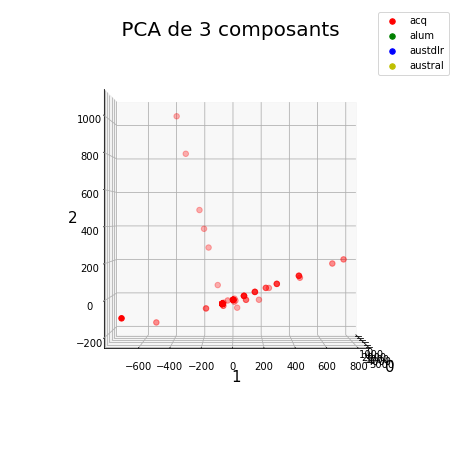

In [ ]:
df4 = pd.DataFrame(H_test_gram)
PlotClusters(df4,labels4[:100],0,0)

In [ ]:
import numpy as np

def gram_matrix(X, degree, offset):
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    for i, x_i in enumerate(X):
        for j, x_j in enumerate(X):
            K[i, j] = (np.dot(x_i, x_j) + offset) ** degree
    return K

In [ ]:
X = np.array([[0, 1], [2, 3], [4, 5]])


In [ ]:
degree = 1
offset = 2
H_gram_noyau = gram_matrix(H_test, degree, offset)
H_gram_noyau

array([[20.65959511,  2.        ,  2.        , ...,  2.        ,
        29.98939266, 11.32979755],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ],
       ...,
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ],
       [29.98939266,  2.        ,  2.        , ...,  2.        ,
        43.98408899, 15.99469633],
       [11.32979755,  2.        ,  2.        , ...,  2.        ,
        15.99469633,  6.66489878]])

In [ ]:
import sys
H_gram_noyau[H_gram_noyau == 0] = sys.float_info.epsilon
W, H = symmetric_nmf(H_gram_noyau, 4)
print("W = ",W.shape)

W =  (100, 4)


In [ ]:
import numpy as np

def gram_matrix(X):
  return X @ X.T
H_gram_noyau = gram_matrix(H_gram_noyau)
H_gram_noyau.shape

(100, 100)

In [ ]:
print("puretée :",purity_score(W,H_test))
print("entropie:",entropy(W))
print("Indice de Dunn :",Dunn(W,labels_test))
print("(l’indice DB de Davies et Bouldin",metrics.davies_bouldin_score(W, labels_test))
print("l’indice CH de Calinsky et Harabsz",metrics.calinski_harabasz_score(W, labels_test))

puretée : 0.1025
entropie: [3.60417592 3.20987909 2.9660988  3.67932909]
Indice de Dunn : 0.03479135839237573
(l’indice DB de Davies et Bouldin 6.602654814831487
l’indice CH de Calinsky et Harabsz 0.5452579866309694


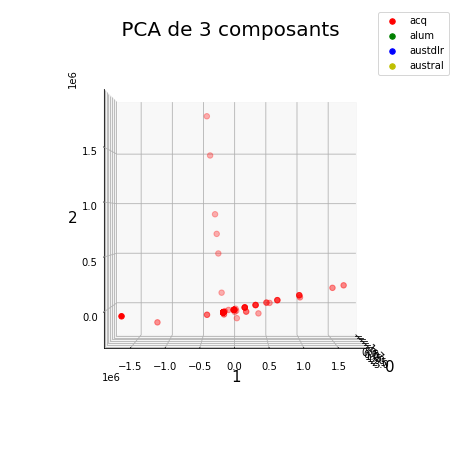

In [ ]:
df5 = pd.DataFrame(H_gram_noyau)
PlotClusters(df5,labels4[:100],0,0)



---


les 2 blocs de code ci-dessous sont pour filtrer et traiter nos textes, mais vu que nous avons utiliser "TfidfVectorizer" qui le fait déjà pour nous, nous n'avons pas fait ce traitement au préalable.





In [ ]:
def process_token(token): #test si un mot doit etre éliminer ou pas.
    token = token.lower()
    if len(token) < 4: # If True, do not return token
        return None
    if not(token.isalpha()): # If True, do not return token
        return None
    return token # If all are False, return the lowercased token

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def tokenize(text):#filtre les textes en éliminant le ponctuation / mots inutiles.
  stop_words = set(stopwords.words('english'))

  word_tokens = word_tokenize(text)

  #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

  filtered_text = []

  for w in word_tokens:
    if process_token(w) != None: #ne pas prendre en compte les nombres et les mots de longueur < 4.
      if w not in stop_words:
          filtered_text.append(w)
  return filtered_text